In [8]:
import pandas as pd
df = pd.read_csv("/content/sales_data_sample.csv", encoding='latin-1')
print(df)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

In [9]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

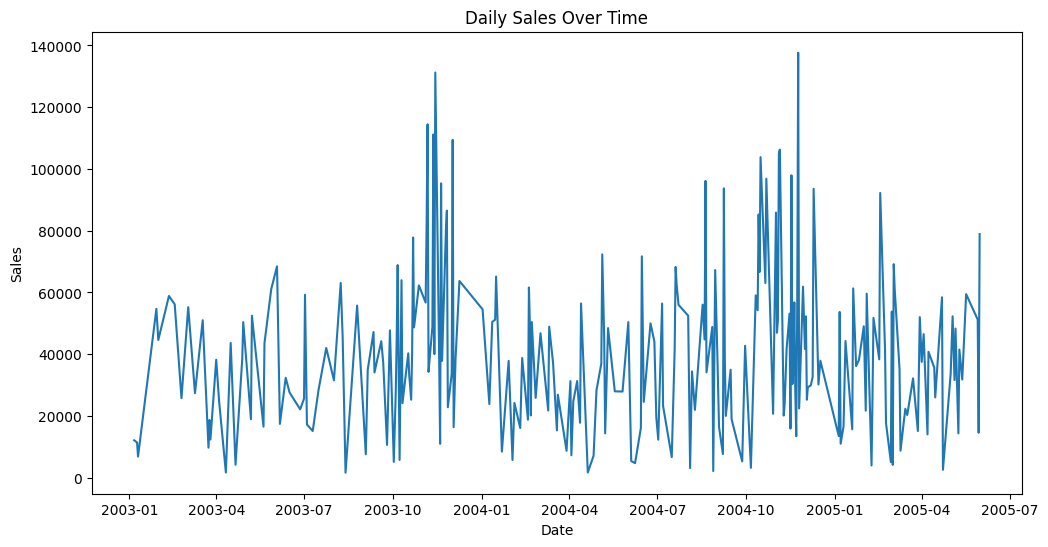

In [10]:
#Sales Over Time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas in case it wasn't already imported

# Convert date column to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']) # Use 'df' instead of 'sales_data'

# Group by date and sum up sales
daily_sales = df.groupby('ORDERDATE')['SALES'].sum().reset_index() # Use 'df' here as well

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='ORDERDATE', y='SALES')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

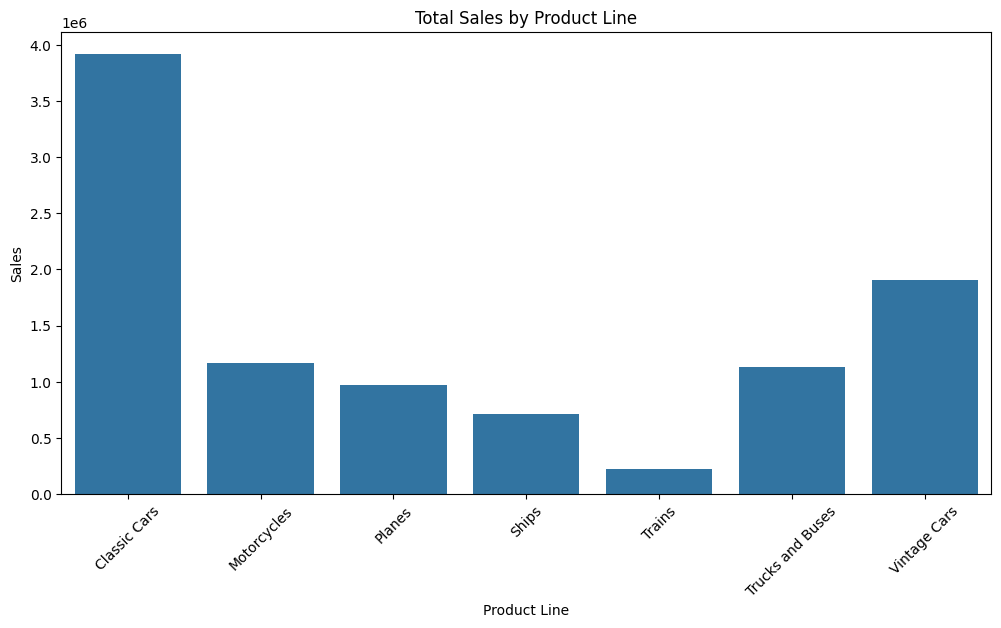

In [11]:
#Sales by Product Line
# Group by product line and sum up sales
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index() # Use 'df' instead of 'sales_data'

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales, x='PRODUCTLINE', y='SALES')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

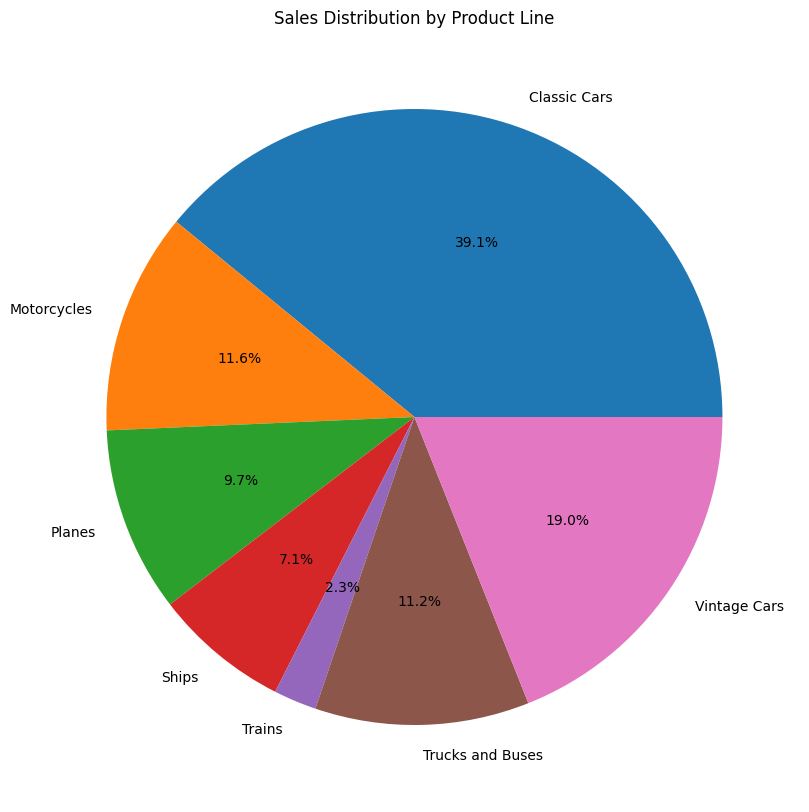

In [12]:
#Sales Distribution by Product Line
product_sales.set_index('PRODUCTLINE', inplace=True)

# Plot
plt.figure(figsize=(10, 10))
product_sales['SALES'].plot.pie(autopct='%1.1f%%')
plt.title('Sales Distribution by Product Line')
plt.ylabel('')
plt.show()


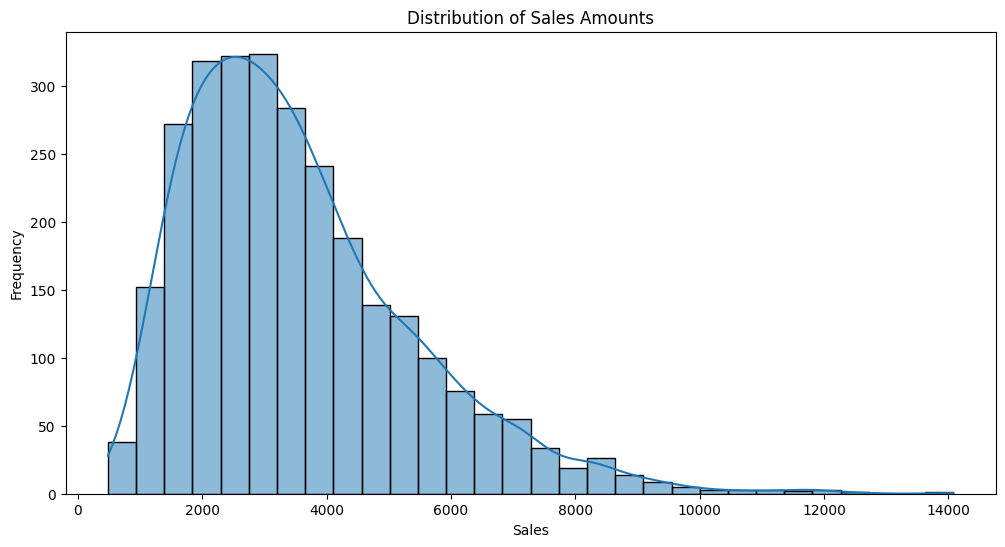

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Use 'df' as it is defined in the environment
sns.histplot(df['SALES'], bins=30, kde=True)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

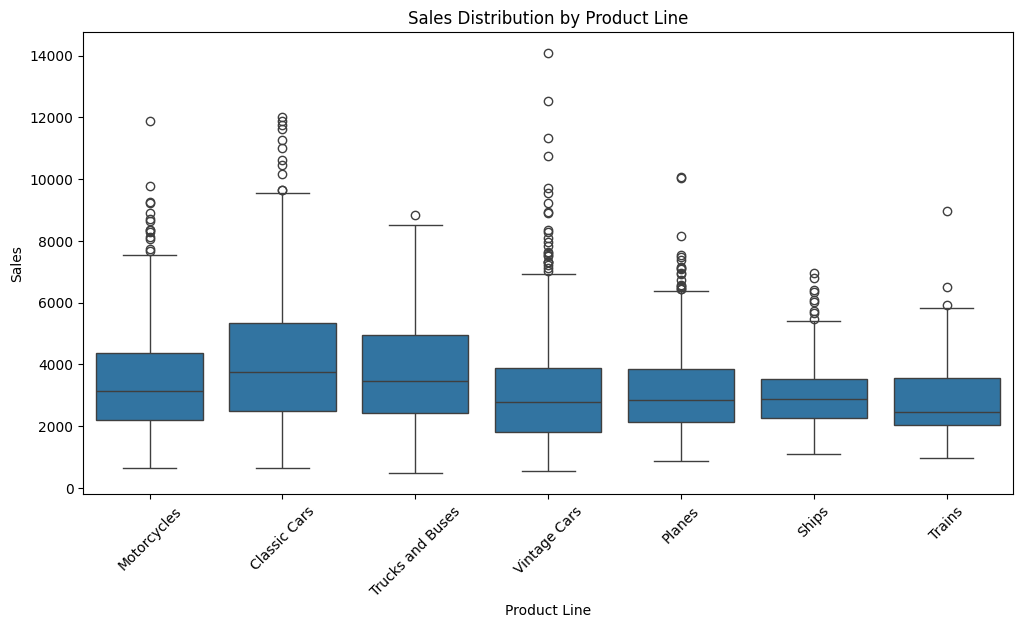

In [16]:
# Box plot of sales by product line
plt.figure(figsize=(12, 6))
# Use 'df' as it is defined in the environment
sns.boxplot(data=df, x='PRODUCTLINE', y='SALES')
plt.title('Sales Distribution by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

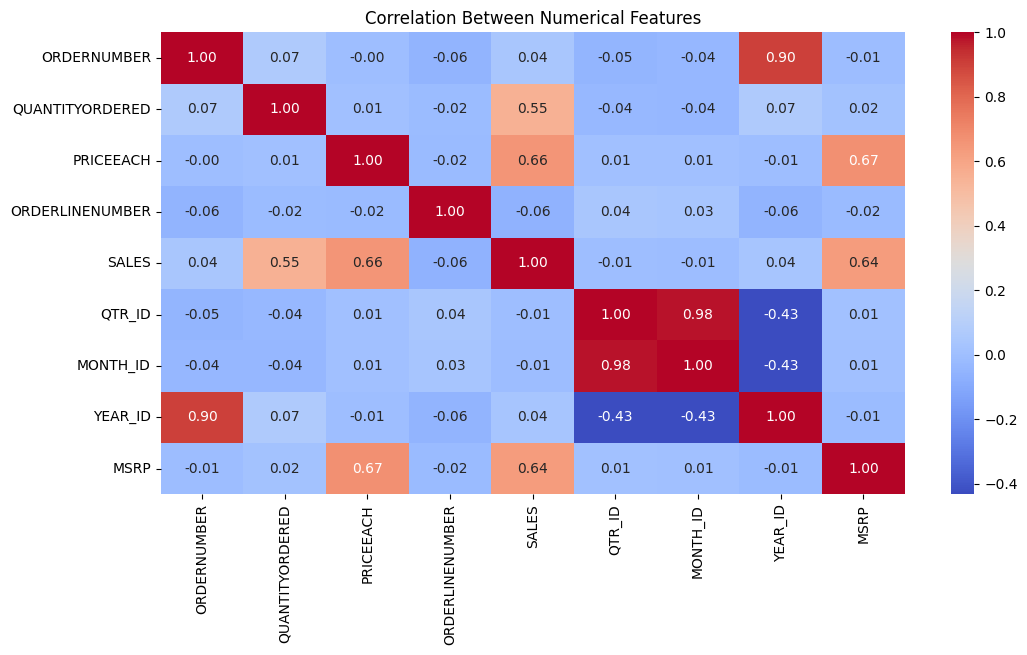

In [21]:


# Calculate the correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numerical Features')
plt.show()